# NBA Season Wins 

## Business Understanding

Most NBA sports algorithms try to predict winning each individual game instead of looking at the season as a whole [site](https://towardsdatascience.com/building-my-first-machine-learning-model-nba-prediction-algorithm-dee5c5bc4cc1).  Algorithms only take into account features from the last 10 games or so. These metrics can be used in scouting to help build a better team within NBA the salary cap. H0= Season long wins are determined mainly by ranking HA= Season long wins are determined by anything other than rankings

### Stakeholder/Business Problem: 

I was hired by Houton Rockets Organization to explore other methods of predicting a team's season-long rank and what features contribute to that prediction from the data provided. 

## Data Understanding

### Data Source: 

I manually scraped the data from the [site](https://www.basketball-reference.com/leagues/NBA_2022.html) for each season from 1986-2022. This was to give me a sufficient amount of data to model. I took the season summary from each year and imported it into an excel file from csv. After putting all the data into Excel I concated the data frames into one single frame to use in modeling. 

### Data Gathering Instructions: 

1. Went to [site](https://www.basketball-reference.com/leagues/NBA_2022.html) and scrolled down to "Share and Export" section of the team summary data. 
2. copied and pasted that data into an Excel spreadsheet.
4. Made the data fit the format by using the "text to columns" function in Excel
5. Saved the data for that year and then repreated this for 35 NBA seasons to get enough data for modeling

### Data Preparation: 

-Step 1: Data consists of 2 separate data frames. data frame one contains 24 features. 1 categorical column (Team Name). Data frame 2 contains information that should be dropped. Drop: first row of int., player, position, nationality, and college.¶

-Step 2: create columns with list values with each teams Average weight, height, age, and experience.

-Step 3: Concatinate both data frames so that the features are all condensed for modeling

-Step 4: create new collumn with team wins for target value.

In [1]:
# Data processing
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style('darkgrid')


# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score


# Modeling prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import LinearRegression

#Scroll bar shows entire data frame
from IPython.display import display
pd.options.display.max_columns = None

%matplotlib inline

In [2]:
# File handling 
import sys
import os
import glob
module_path = os.path.abspath(os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
! ls data

NBA_1986_season.csv
NBA_1987_season.csv
NBA_1988_season.csv
NBA_1989_season.csv
NBA_1990_season.csv
NBA_1991_season.csv
NBA_1992_season.csv
NBA_1993_season.csv
NBA_1994_season.csv
NBA_1995_season.csv
NBA_1996_season.csv
NBA_1997_season.csv
NBA_1998_season.csv
NBA_1999_season.csv
NBA_2000_season.csv
NBA_2001_season.csv
NBA_2002_season.csv
NBA_2003_season.csv
NBA_2004_season.csv
NBA_2005_season.csv
NBA_2006_season.csv
NBA_2007_season.csv
NBA_2008_season.csv
NBA_2009_season.csv
NBA_2010_season.csv
NBA_2011_season.csv
NBA_2012_season.csv
NBA_2013_season.csv
NBA_2014_season.csv
NBA_2015_season.csv
NBA_2016_season.csv
NBA_2017_season.csv
NBA_2018_season.csv
NBA_2019_season.csv
NBA_2020_season.csv
NBA_2021_season.csv
NBA_2022_season.csv


In [4]:
df1986 = pd.read_csv('data/NBA_1986_season.csv')
df1987 = pd.read_csv('data/NBA_1987_season.csv')
df1987.shape

(24, 25)

Using the code from stack overflow [https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe] I was able to condense the dataframe into one easier to manipulate dataframe.

In [5]:


path = './data' # use your path
all_files = glob.glob(path + "/*.csv")
print(all_files)
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

['./data\\NBA_1986_season.csv', './data\\NBA_1987_season.csv', './data\\NBA_1988_season.csv', './data\\NBA_1989_season.csv', './data\\NBA_1990_season.csv', './data\\NBA_1991_season.csv', './data\\NBA_1992_season.csv', './data\\NBA_1993_season.csv', './data\\NBA_1994_season.csv', './data\\NBA_1995_season.csv', './data\\NBA_1996_season.csv', './data\\NBA_1997_season.csv', './data\\NBA_1998_season.csv', './data\\NBA_1999_season.csv', './data\\NBA_2000_season.csv', './data\\NBA_2001_season.csv', './data\\NBA_2002_season.csv', './data\\NBA_2003_season.csv', './data\\NBA_2004_season.csv', './data\\NBA_2005_season.csv', './data\\NBA_2006_season.csv', './data\\NBA_2007_season.csv', './data\\NBA_2008_season.csv', './data\\NBA_2009_season.csv', './data\\NBA_2010_season.csv', './data\\NBA_2011_season.csv', './data\\NBA_2012_season.csv', './data\\NBA_2013_season.csv', './data\\NBA_2014_season.csv', './data\\NBA_2015_season.csv', './data\\NBA_2016_season.csv', './data\\NBA_2017_season.csv', './data

In [6]:
#dropped all columns with null values
frame.dropna(inplace=True)

## Eploratory Data Analysis

In [7]:
# Original frame
frame.shape

(1057, 25)

In [8]:
#Concat all 35 data frames using BLob function in pandas
pd.concat([df1986, df1987], ignore_index=False)

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Los Angeles Lakers*,82,241.8,46.8,89.5,0.522,1.7,5.0,0.337,45.1,84.6,0.533,22.1,28.4,0.778,13.4,31.2,44.6,29.7,8.5,5.1,17.9,24.8,117.3
1,2.0,Dallas Mavericks*,82,241.5,44.3,88.5,0.501,1.7,5.4,0.316,42.6,83.0,0.513,25.0,32.2,0.776,12.9,29.9,42.8,25.7,7.4,4.5,15.7,21.1,115.3
2,3.0,Portland Trail Blazers*,82,242.1,44.0,88.8,0.496,0.9,3.4,0.269,43.1,85.4,0.505,26.1,34.1,0.765,14.1,28.2,42.3,26.6,10.5,4.3,18.6,26.9,115.1
3,4.0,Denver Nuggets*,82,240.9,45.2,96.0,0.471,0.9,3.7,0.233,44.3,92.2,0.480,23.5,29.5,0.798,14.9,28.3,43.2,26.1,10.1,5.1,16.3,26.4,114.8
4,5.0,Milwaukee Bucks*,82,241.5,43.9,89.1,0.493,1.5,4.7,0.327,42.4,84.5,0.502,25.2,32.9,0.764,14.5,29.5,44.0,26.3,9.8,5.6,16.7,27.0,114.5
5,6.0,Houston Rockets*,82,240.9,45.8,93.5,0.490,1.0,3.8,0.274,44.8,89.8,0.499,21.7,29.7,0.730,16.0,29.7,45.7,28.3,9.1,6.7,16.8,24.3,114.4
6,7.0,Detroit Pistons*,82,241.2,45.8,94.5,0.484,0.7,2.2,0.302,45.1,92.3,0.489,22.0,28.0,0.783,15.6,30.0,45.6,28.3,9.0,4.1,16.4,25.6,114.2
7,8.0,Boston Celtics*,82,242.1,45.3,89.2,0.508,1.7,4.8,0.351,43.7,84.4,0.517,21.8,27.4,0.794,12.9,33.6,46.4,29.1,7.8,6.2,16.6,21.4,114.1
8,9.0,Golden State Warriors,82,241.2,44.5,92.3,0.482,1.1,3.4,0.313,43.5,88.9,0.489,23.3,30.7,0.760,15.5,28.6,44.1,24.6,9.2,4.3,17.1,24.8,113.4
9,10.0,San Antonio Spurs*,82,241.5,43.9,86.6,0.506,0.6,2.4,0.235,43.3,84.2,0.514,23.0,30.8,0.746,13.0,29.4,42.5,27.6,9.8,4.8,19.8,25.8,111.2


In [9]:
# Checkin for NaN values
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 0 to 1092
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      1057 non-null   float64
 1   Team    1057 non-null   object 
 2   G       1057 non-null   int64  
 3   MP      1057 non-null   float64
 4   FG      1057 non-null   float64
 5   FGA     1057 non-null   float64
 6   FG%     1057 non-null   float64
 7   3P      1057 non-null   float64
 8   3PA     1057 non-null   float64
 9   3P%     1057 non-null   float64
 10  2P      1057 non-null   float64
 11  2PA     1057 non-null   float64
 12  2P%     1057 non-null   float64
 13  FT      1057 non-null   float64
 14  FTA     1057 non-null   float64
 15  FT%     1057 non-null   float64
 16  ORB     1057 non-null   float64
 17  DRB     1057 non-null   float64
 18  TRB     1057 non-null   float64
 19  AST     1057 non-null   float64
 20  STL     1057 non-null   float64
 21  BLK     1057 non-null   float64
 22  

In [10]:
frame.shape

(1057, 25)

In [11]:
# Descriptive statistics .describe()
frame.describe()
# Need to change Rk  to int data from ordinal 

,Rk,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000
mean,14.859035,79.460738,241.702176,38.315989,83.516746,0.458551,6.132640,17.341722,0.345306,32.186471,66.174267,0.487512,18.987417,25.132734,0.756069,11.959319,30.748912,42.705203,22.836518,7.927909,5.010974,15.050142,21.721192,101.753264
std,8.364676,6.957706,0.859916,2.884326,4.426377,0.019126,3.302683,8.918630,0.032627,4.373536,9.316741,0.025422,2.435455,3.179234,0.030073,1.895387,2.391118,2.142053,2.464473,1.031698,0.899480,1.494517,2.106656,7.034200
min,1.000000,50.000000,240.000000,30.800000,71.200000,0.401000,0.300000,1.600000,0.161000,23.100000,41.900000,0.421000,12.200000,16.600000,0.660000,7.600000,24.900000,35.600000,15.600000,5.500000,2.400000,11.100000,16.600000,81.900000
25%,8.000000,82.000000,241.200000,36.200000,80.300000,0.445000,3.800000,11.100000,0.333000,29.300000,60.200000,0.470000,17.200000,22.800000,0.738000,10.600000,29.100000,41.200000,21.000000,7.200000,4.400000,14.000000,20.200000,96.600000
50%,15.000000,82.000000,241.500000,38.100000,83.300000,0.458000,5.800000,16.300000,0.351000,31.000000,64.600000,0.486000,18.700000,24.900000,0.757000,11.800000,30.400000,42.700000,22.500000,7.800000,4.900000,14.900000,21.600000,101.100000
75%,22.000000,82.000000,242.100000,40.400000,86.800000,0.471000,8.000000,22.300000,0.365000,33.600000,70.600000,0.503000,20.400000,27.300000,0.777000,13.100000,32.200000,44.200000,24.500000,8.600000,5.500000,16.000000,23.000000,106.600000
max,30.000000,82.000000,244.900000,47.600000,108.100000,0.522000,16.700000,45.400000,0.428000,45.100000,95.200000,0.571000,28.200000,35.700000,0.839000,18.500000,42.200000,51.700000,30.400000,12.800000,8.700000,21.500000,29.000000,120.100000


In [12]:
frame['Rk'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
        ... 
1088    26.0
1089    27.0
1090    28.0
1091    29.0
1092    30.0
Name: Rk, Length: 1057, dtype: float64>

For aesthetic reasons I wanted to move the X -axis labels to the top. I googled "sn.heatmap move x axis labels to top" and found [this resource](https://stackoverflow.com/questions/51759859/how-to-move-labels-from-bottom-to-top-without-adding-ticks).

Additionally I wanted to make visual larger and google "sn.heatmap making size larger" and found [This source](https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn).

Visuals such as heatmap (show multicolinearity), Hist and bar graphs comparing features to target (total 2022 wins)

<AxesSubplot:>

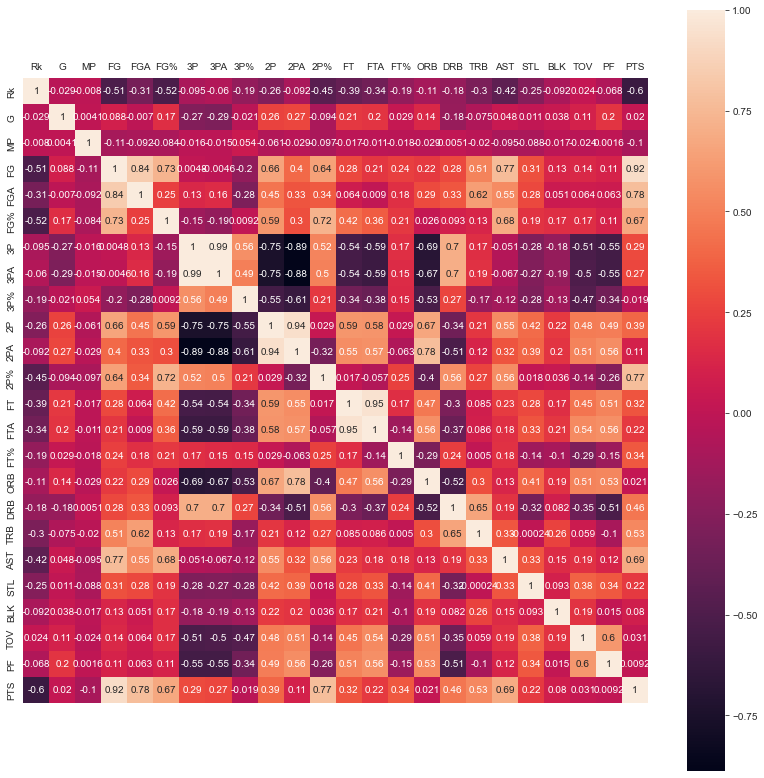

In [13]:
# Pearson correlation
# This adjust figure size
plt.figure(figsize = (14,14))

# This moves X axis labels to the top
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

# This code generates visual
corr = frame.corr()
sns.heatmap(corr, square=True, annot = True)



#ax = sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5)

Assumption 3: Little to no multicollinearity among predictors


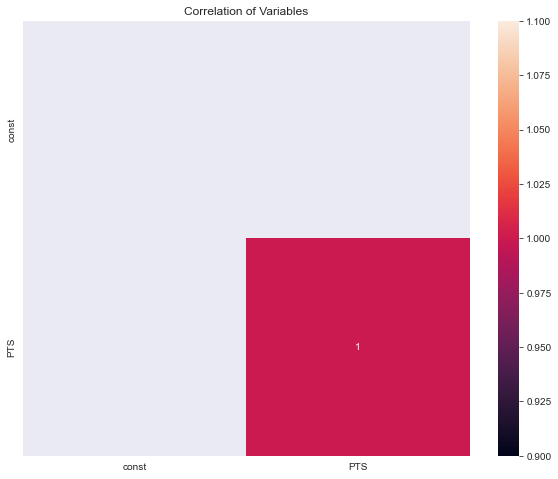

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------


TypeError: 'NoneType' object is not subscriptable

In [104]:
multicollinearity_assumption(model, X_train, y_train)

Discuss target and identify your strongest correlating features

Explore multicolinearity among those features

Discuss any interesting correlations using my expertise

<AxesSubplot:xlabel='PTS', ylabel='Rk'>

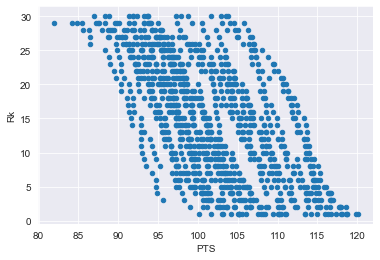

In [14]:
# scatter plot strongest correlated feature
frame.plot.scatter('PTS','Rk')

<AxesSubplot:xlabel='FGA', ylabel='Rk'>

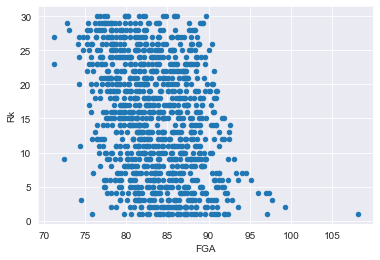

In [15]:
# scatter plot of second strongest correlated feature
frame.plot.scatter('FGA','Rk')

<AxesSubplot:xlabel='FGA', ylabel='PTS'>

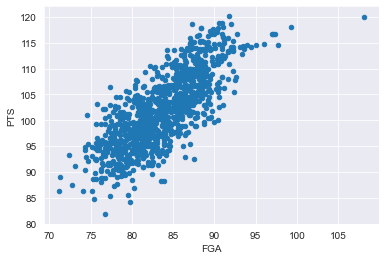

In [16]:
# scatter plot of those 2 features
frame.plot.scatter('FGA','PTS')


<AxesSubplot:xlabel='TRB', ylabel='Rk'>

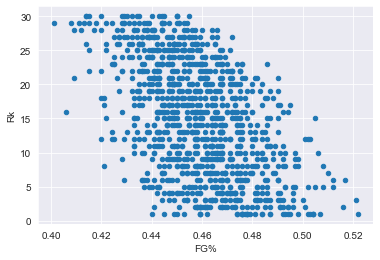

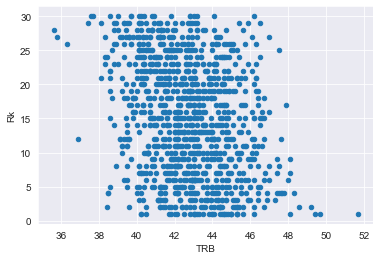

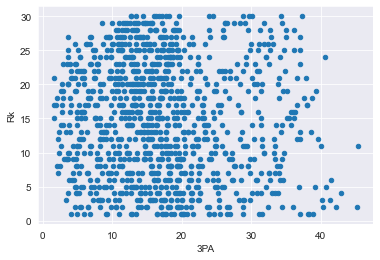

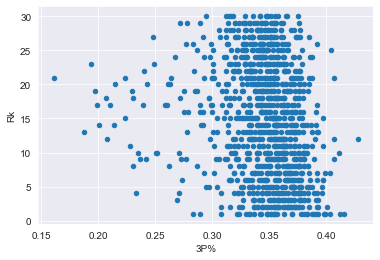

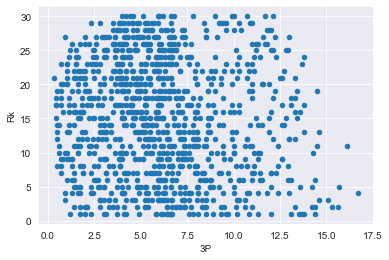

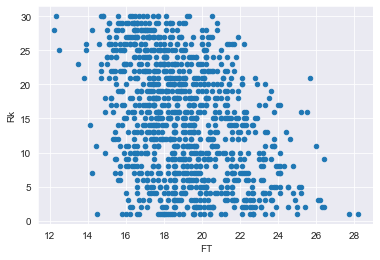

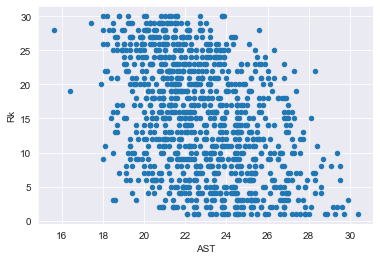

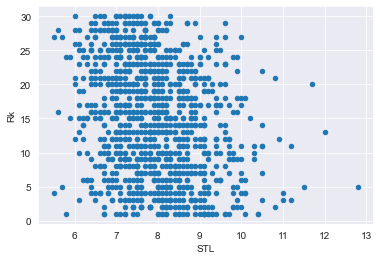

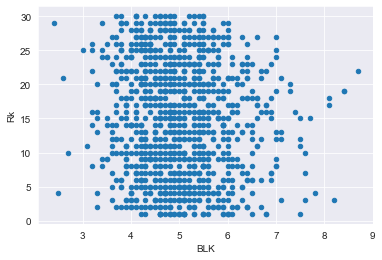

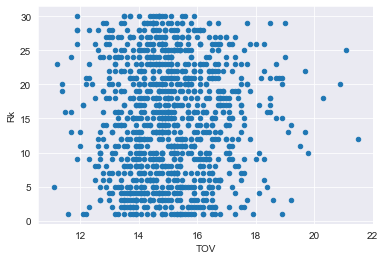

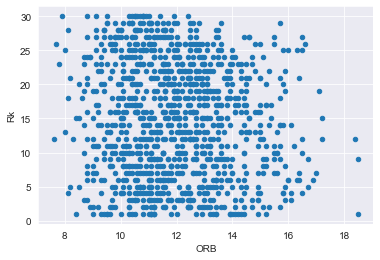

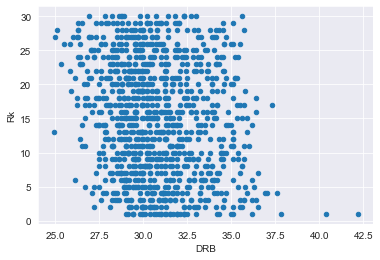

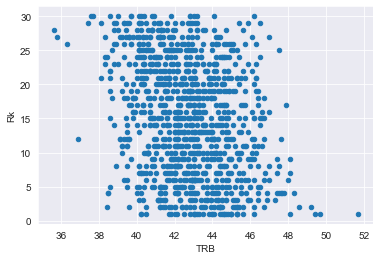

In [17]:
# any other scatter plots
#Do scatter plot with features and target to also show multicolinearity
frame.plot.scatter('FG%','Rk')
frame.plot.scatter('TRB','Rk')
frame.plot.scatter('3PA','Rk') 
frame.plot.scatter('3P%','Rk') 
frame.plot.scatter('3P','Rk') 
frame.plot.scatter('FT','Rk')
frame.plot.scatter('AST','Rk')
frame.plot.scatter('STL','Rk')
frame.plot.scatter('BLK','Rk') 
frame.plot.scatter('TOV','Rk') 
frame.plot.scatter('ORB','Rk')
frame.plot.scatter('DRB','Rk')
frame.plot.scatter('TRB','Rk')

Discuss the scatter plots above and identify some features that are strongly correlated with the target with low multicolinearity.

## Baseline Model

Strongest correlated feature starying with single regression model

In [77]:
import statsmodels.api as sm

In [78]:
# Data frmes that only contain vairable for baseline model
# Define Target (y) and Feature Matrix (X)
y = frame['Rk']
X = frame['PTS']
X = sm.add_constant(X)

C:\Users\jharper503\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [79]:
len(frame['Rk'].values.reshape(-1, 1))

1057

In [80]:


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                   random_state=1)
# Split training data into validation data
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.1,
                                                   random_state=1)
# Instantiate the object
model = LinearRegression().fit(X_train, y_train)
model.intercept_

85.15205529961972

In [81]:
len(X_val)

27

In [82]:
# R^2 value
model.score(X_train, y_train)
model.score(X_test, y_test)

0.3763260292467713

In [88]:
print(y_test)

455     10.0
786      3.0
1077    15.0
600      3.0
635      7.0
        ... 
774     22.0
596     30.0
6        7.0
1071     9.0
565     30.0
Name: Rk, Length: 238, dtype: float64


In [89]:
len(y_pred)

238

In [87]:
y_pred = model.predict(X_test)
print(y_pred)

[18.40555812 12.19337121  9.29435065 12.40044411 13.36678429 14.05702728
 18.40555812 19.30287401 14.47117308 16.61092635 12.5384927  16.19678055
  9.22532635 14.05702728 20.82140859 20.82140859 15.36848896 19.30287401
 13.22873569 17.50824223 21.16653008 16.95604784  6.18825719 15.29946467
 10.26069083  7.29264598  4.66972261 17.50824223 22.06384597 12.607517
 19.7170198   9.77752074 16.47287775 19.16482541 15.23044037 15.78263476
 18.19848523 13.43580859 19.993117    6.67142728 15.23044037 12.9526385
 22.54701607 21.58067588 19.7170198  14.12605158 10.46776373 22.68506466
 10.26069083 10.26069083  8.74215626 11.29605532 19.16482541 16.19678055
 20.1311656  10.12264224 13.64288149 16.47287775 20.82140859  3.22021233
 19.37189831  6.05020859 11.84824971 14.19507588 15.71361046 13.0216628
 17.02507214  9.77752074 14.95434317 10.95093383 11.57215252 25.51506092
 11.91727401 14.54019738 16.54190205 12.33141981 11.29605532 19.7860441
 21.85677307 17.09409644 16.81799924 19.8550684   5.9811

In [84]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.59992826239337
Mean Squared Error: 46.37526415408884
Root Mean Squared Error: 6.809938630713851


In [85]:
# model evaluation for testing set
rmse = metrics.mean_squared_error(y_test, y_pred, squared = True)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 46.37526415408884
R2 score is 0.3763260292467713


In [ ]:
# Train Test Split

In [ ]:
# Instantiate model for linear regression

In [96]:
preds = list(y_pred)
act = list(y_test.values)
dictionary = {'Actual': act, 'Predicted': preds}
dictionary

{'Actual': [10.0,
  3.0,
  15.0,
  3.0,
  7.0,
  1.0,
  7.0,
  14.0,
  8.0,
  29.0,
  1.0,
  12.0,
  8.0,
  29.0,
  30.0,
  29.0,
  4.0,
  14.0,
  17.0,
  22.0,
  22.0,
  30.0,
  8.0,
  7.0,
  11.0,
  5.0,
  4.0,
  13.0,
  30.0,
  15.0,
  9.0,
  10.0,
  9.0,
  24.0,
  5.0,
  4.0,
  22.0,
  21.0,
  24.0,
  9.0,
  14.0,
  20.0,
  28.0,
  23.0,
  22.0,
  7.0,
  1.0,
  27.0,
  11.0,
  13.0,
  6.0,
  14.0,
  3.0,
  6.0,
  28.0,
  6.0,
  20.0,
  5.0,
  28.0,
  1.0,
  8.0,
  9.0,
  5.0,
  21.0,
  24.0,
  3.0,
  13.0,
  17.0,
  22.0,
  23.0,
  9.0,
  26.0,
  15.0,
  16.0,
  14.0,
  1.0,
  26.0,
  23.0,
  28.0,
  26.0,
  11.0,
  28.0,
  5.0,
  8.0,
  2.0,
  20.0,
  29.0,
  6.0,
  29.0,
  4.0,
  25.0,
  10.0,
  9.0,
  13.0,
  1.0,
  9.0,
  22.0,
  6.0,
  15.0,
  17.0,
  17.0,
  6.0,
  25.0,
  17.0,
  12.0,
  12.0,
  18.0,
  13.0,
  1.0,
  16.0,
  15.0,
  22.0,
  18.0,
  8.0,
  24.0,
  30.0,
  19.0,
  17.0,
  1.0,
  14.0,
  15.0,
  26.0,
  13.0,
  1.0,
  26.0,
  15.0,
  27.0,
  20.0,
  17.0,
  2.

In [97]:
# predictions based on test data
df = pd.DataFrame.from_dict(dictionary)
df

,Actual,Predicted
0,10.0,18.405558
1,3.0,12.193371
2,15.0,9.294351
3,3.0,12.400444
4,7.0,13.366784
...,...,...
233,22.0,20.545311
234,30.0,23.858478
235,7.0,6.326306
236,9.0,7.568743


In [ ]:
# visualize regression line

### Evaluation

## Two Feature Model

2 Strongest correlated features multiple regression model

In [109]:
# Data frames that only contain 2 vairables for baseline model
y2 = frame['Rk']
X2 = frame[['PTS', 'PF']]
X2 = sm.add_constant(X2)

# Train Test Split
# Split data into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.25,
                                                   random_state=1)
# Split training data into validation data
X2_test, X2_val, y2_test, y2_val = train_test_split(X2_test, y2_test, test_size=.1,
                                                   random_state=1)

model_2 = LinearRegression().fit(X2_train, y2_train)

C:\Users\jharper503\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [110]:
# R^2 value
model_2.score(X2_train, y2_train)
model_2.score(X2_test, y2_test)

0.37476440132109656

In [ ]:
# Instantiate model for linear regression

In [111]:
# predictions based on test data
y2_pred = model_2.predict(X2_test)

In [112]:
rmse_model_2 = metrics.mean_squared_error(y2_test, y2_pred, squared = True)
r2_model_2 = metrics.r2_score(y2_test, y2_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_model_2))
print('R2 score is {}'.format(r2_model_2))

The model performance for testing set
--------------------------------------
RMSE is 46.491383971428824
R2 score is 0.37476440132109656


In [ ]:
# visualize regression line

### Model 3

In [113]:
X3 = frame[['PTS', 'PF', 'FGA', '3P%', '2P%', 'DRB', 'TOV', 'FG%']]
y3 = frame['Rk']

In [114]:
# Split data into train and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=.25,
                                                   random_state=1)
# Split training data into validation data
X3_test, X3_val, y3_test, y3_val = train_test_split(X3_test, y3_test, test_size=.1,
                                                   random_state=1)
# Instantiate the object
model_3 = LinearRegression().fit(X3_train, y3_train)
model_3.intercept_

58.753715916473475

In [116]:
# predictions based on test data
y3_pred = model_3.predict(X3_test)

In [117]:
rmse_model_3 = metrics.mean_squared_error(y3_test, y3_pred, squared = True)
r2_model_3 = metrics.r2_score(y3_test, y3_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_model_3))
print('R2 score is {}'.format(r2_model_3))

The model performance for testing set
--------------------------------------
RMSE is 35.60996118736246
R2 score is 0.5211023312277443


## Model 4

In [119]:
X4 = frame.drop(['Rk','Team', 'MP', 'G', 'FG', '3P', '2P', '3PA', '2PA', 'TRB'], axis=1)
y4 = frame['Rk']

In [120]:
# Train Test Split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=.25,
                                                   random_state=1)
# Split training data into validation data
X4_test, X4_val, y4_test, y4_val = train_test_split(X4_test, y4_test, test_size=.1,
                                                   random_state=1)
# Instantiate the object
model_4 = LinearRegression().fit(X4_train, y4_train)
model_4.intercept_

155.86153926536778

In [121]:
# Instantiate model for linear regression

In [122]:
# predictions based on test data
y4_pred = model_4.predict(X4_test)

In [123]:
rmse_model_4 = metrics.mean_squared_error(y4_test, y4_pred, squared = True)
r2_model_4 = metrics.r2_score(y4_test, y4_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_model_4))
print('R2 score is {}'.format(r2_model_4))

The model performance for testing set
--------------------------------------
RMSE is 30.73641114674502
R2 score is 0.5866438728434904


In [ ]:
# visualize regression line

## Model 5

In [125]:
X5 = frame.drop(['Rk','Team', 'MP', 'G'], axis=1)
y5 = frame['Rk']

In [126]:
# Train Test Split
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=.25,
                                                   random_state=1)
# Split training data into validation data
X5_test, X5_val, y5_test, y5_val = train_test_split(X5_test, y5_test, test_size=.1,
                                                   random_state=1)
# Instantiate the object
model_5 = LinearRegression().fit(X5_train, y5_train)
model_5.intercept_

260.17167680165846

In [127]:
# predictions based on test data
y5_pred = model_5.predict(X5_test)

In [128]:
rmse_model_5 = metrics.mean_squared_error(y5_test, y5_pred, squared = True)
r2_model_5 = metrics.r2_score(y5_test, y5_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_model_5))
print('R2 score is {}'.format(r2_model_5))

The model performance for testing set
--------------------------------------
RMSE is 30.571350911374395
R2 score is 0.5888636720033402


### Evaluation

In [103]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))

        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')